# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from xgboost import XGBRegressor
warnings.filterwarnings('ignore')

### 1.1 Откройте файлы и изучите их. 

In [2]:
g_r_train = pd.read_csv('/datasets/gold_recovery_train.csv')

In [3]:
g_r_train.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [4]:
g_r_train.shape

(16860, 87)

In [5]:
g_r_test = pd.read_csv('/datasets/gold_recovery_test.csv')

In [6]:
g_r_test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


In [7]:
g_r_test.shape

(5856, 53)

In [8]:
g_r_full= pd.read_csv('/datasets/gold_recovery_full.csv')

In [9]:
g_r_full.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [10]:
g_r_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

Преобразуем дату в индекс во всех трех датасетах

In [11]:
g_r_train['date']= pd.to_datetime(g_r_train['date'], format='%Y-%m-%dT%H:%M:%S')
g_r_test['date']= pd.to_datetime(g_r_train['date'], format='%Y-%m-%dT%H:%M:%S')
g_r_full['date']= pd.to_datetime(g_r_full['date'], format='%Y-%m-%dT%H:%M:%S')

In [12]:
g_r_train.set_index('date', inplace = True)
g_r_test.set_index('date', inplace = True)
g_r_full.set_index('date', inplace = True)

Построим гистограмму  по датам сбора и обработки данных 

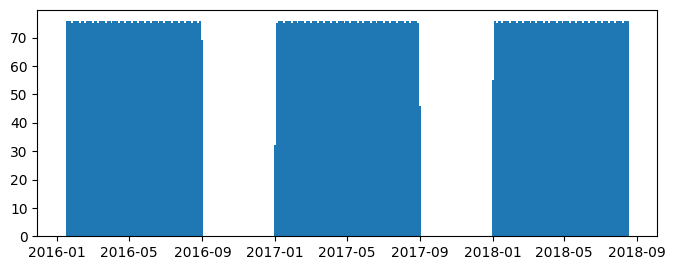

In [13]:
fig = plt.figure(figsize=(8,3), dpi=100)
plt.hist(g_r_train.index, bins = 300);

Таким образом у нас есть три датасета с данными. В полном датасете 86 колонок и 22716 строк. Данный датасет разбит на два:
    
- тестовый 52 признака
- тренировочный 86 признака

Все данные разбиты на три производственных цикла, каждый из которых длится 9 месяцев (в 2016, 2017, 2018 годах)

### 1.2. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

Введем обозначения

С - 'rougher.output.concentrate_au' - концентрация золота в черновом концентрате

F - 'rougher.input.feed_au' - концентрация золота концентрация  в руде

T - 'rougher.output.tail_au' - концентрация золота в отвале этапа флотации

Recovery - 'rougher.output.recovery' эффективность обогащения чернового концентрата

Запишим в отдельный датасет переменные 

In [14]:
tmp = dict([('C',g_r_full['rougher.output.concentrate_au']), 
            ('F',g_r_full['rougher.input.feed_au']),('T',g_r_full['rougher.output.tail_au']),
            ('Recovery',g_r_full['rougher.output.recovery'])])

In [15]:
data = pd.DataFrame(data = tmp)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 4 columns):
C           22618 non-null float64
F           22617 non-null float64
T           19980 non-null float64
Recovery    19597 non-null float64
dtypes: float64(4)
memory usage: 887.3 KB


Text(0.5, 1.0, 'Recovery')

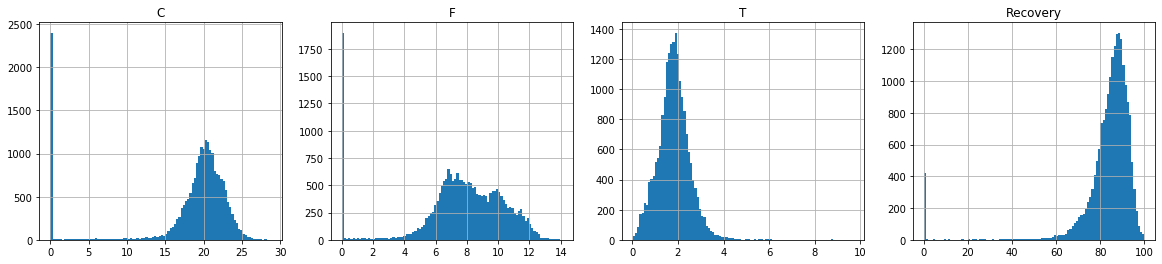

In [17]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4));
data['C'].hist(ax=axes[0], bins = 100)
axes[0].set_title('C')
data['F'].hist(ax=axes[1], bins = 100)
axes[1].set_title('F')
data['T'].hist(ax=axes[2], bins = 100)
axes[2].set_title('T')
data['Recovery'].hist(ax=axes[3], bins = 100)
axes[3].set_title('Recovery')

In [18]:
data.describe()

,C,F,T,Recovery
count,22618.000000,22617.000000,19980.000000,19597.000000
mean,17.879538,7.565838,1.821193,83.078122
std,6.790112,3.026954,0.695663,14.661880
min,0.000000,0.000000,0.020676,0.000000
25%,17.928729,6.485009,1.403951,80.941306
50%,20.003202,7.884832,1.808567,86.144121
75%,21.564238,9.668064,2.215317,89.987561
max,28.824507,14.093363,9.688980,100.000000


Определенно технология работает. Концентрация после прохождения этапа выше в 2-3 раза, в отвалах меньше в 4 - 5 чем в руде.
Существуют много нулевых измерений. 

Посмотрим как отличается эффективность год от года

In [19]:
data1 = data.loc['2016']
data2 = data.loc['2017']
data3 = data.loc['2018']

Text(0.5, 1.0, 'Recovery')

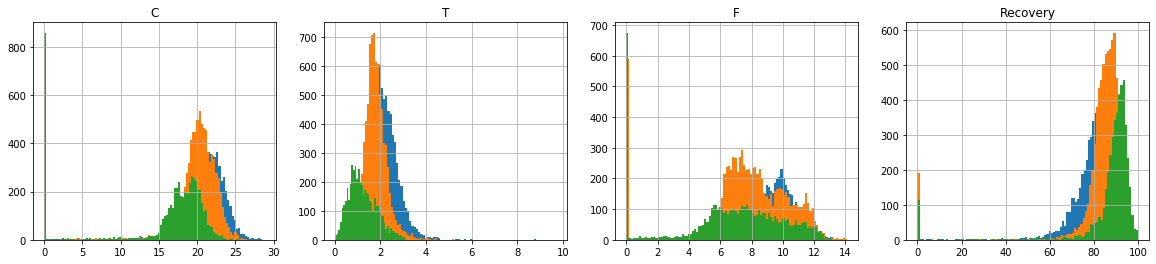

In [20]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4));
data1['C'].hist(ax=axes[0], bins = 100)
data2['C'].hist(ax=axes[0], bins = 100)
data3['C'].hist(ax=axes[0], bins = 100)
axes[0].set_title('C')
data1['T'].hist(ax=axes[1], bins = 100)
data2['T'].hist(ax=axes[1], bins = 100)
data3['T'].hist(ax=axes[1], bins = 100)
axes[1].set_title('T')
data1['F'].hist(ax=axes[2], bins = 100)
data2['F'].hist(ax=axes[2], bins = 100)
data3['F'].hist(ax=axes[2], bins = 100)
axes[2].set_title('F')
data1['Recovery'].hist(ax=axes[3], bins = 100)
data2['Recovery'].hist(ax=axes[3], bins = 100)
data3['Recovery'].hist(ax=axes[3], bins = 100)
axes[3].set_title('Recovery')

In [21]:
print('Recovery in 2016:',data1['Recovery'].mean())
print('Recovery in 2017:',data2['Recovery'].mean())
print('Recovery in 2018:',data3['Recovery'].mean())

Recovery in 2016: 79.94244513431738
Recovery in 2017: 83.67470116490347
Recovery in 2018: 87.23825738272565


Эффективность с каждым годом растет примерно на 5%

Проверим правильность рассчетов 

In [22]:
def recovery(C, F, T):
    value = (((C * (F - T))) / (F * (C - T))) * 100
    #Так как мы не заполняли пропуски, то в значении F, может оказаться пропуск или 0, то наша функция выдаст
    #ошибочное значение, поэтому отсекем эти случаи (от -inf до +inf)
    #Так же данное решение обусловлено min/max значениями rougher.output.recovery, которые лежат от 0 до 100.
    value[value<0] = np.nan
    value[value>100] = np.nan
    return value

In [23]:
data['Recovery_'] = recovery(data['C'],data['F'],data['T'])
data.head(3)

,C,F,T,Recovery,Recovery_
date,,,,,
2016-01-15 00:00:00,19.793808,6.486150,1.170244,87.107763,87.107763
2016-01-15 01:00:00,20.050975,6.478583,1.184827,86.843261,86.843261
2016-01-15 02:00:00,19.737170,6.362222,1.162562,86.842308,86.842308


In [24]:
data.dropna(inplace = True)

In [25]:
print(mean_squared_error(data['Recovery'],data['Recovery_']))

2.1661920457057517e-28


Среднее абсолютное отклонение практически равно нулю. Recovery посчитано верно.

### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [26]:
test = list(g_r_test.columns)
train = list(g_r_train.columns)

In [27]:
res = [x for x in test + train if x not in test or x not in train]
res.sort()
res


['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке отсутсвуют выходные параметры руды, отвалов и расчетные величины. Это означает что в тестовой выборке содержаться  данные по входному сырью и параметрам процесса. 

### 1.4. Проведите предобработку данных.

Заполним пропуски в входных параметрах. Измеряемые данные взяты во времени с периодом в 1 час. 
Показатели процессов и концентрации руды слабо меняются.Резкое изменение в них означало бы срыв процесса. 
А так как мы видели три правильных процесса без остановки, то можем предположить что остановок не было, а значит и параметры менялись плавно.
В таком случае пропуски можно заменить средним между соседними показателями. 

In [28]:

targ =['rougher.output.recovery','final.output.recovery']
full = list(g_r_train.columns)
columns = list(set(full) - set(targ))


In [29]:
for i in range(len(columns)):
    g_r_train[columns[i]] = g_r_train[columns[i]].fillna(method = 'ffill')
    g_r_full[columns[i]] = g_r_full[columns[i]].fillna(method = 'ffill') 

for i in range(len(test)):
    g_r_test[test[i]] = g_r_test[test[i]].fillna(method = 'ffill')

С целевыми признаками мы так поступить не можем. На них будет проходить обучение и сравнение эффективности.
Внесение непроверенной информации может привести  приведет к неправильному обучению модели.
В данном случае просто удалим пропуски

In [30]:
g_r_full['rougher.output.recovery'].dropna(inplace= True)
g_r_full['final.output.recovery'].dropna(inplace =True) 

# 2. Анализ данных

### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

Создадим список необходимых конценраций и список интересующих нас металлов

In [31]:

metals = ['au', 'pb', 'ag']

note = ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_au',
'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_au',
 'rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_au',
'final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_au'] 

Создадим отдельный датасет по интересующим нас металлов

In [32]:
g_r_full_metall = g_r_full[note]

Посмотрим на цифры и гистограмму. 

In [33]:
g_r_full_metall.describe()

,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au
count,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,8.044237,3.282945,7.545861,7.666972,8.809217,29.119967,10.845609,6.886869,17.831509,4.768013,9.071366,39.891718
std,3.148133,1.462554,3.047761,3.134033,3.798169,10.650273,4.406924,2.831347,6.842737,2.042594,3.260960,13.540157
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.935723,2.634169,6.473371,6.756639,7.649745,29.336078,10.112351,6.366740,17.894015,4.011471,8.737809,42.353890
50%,8.295898,3.419915,7.879193,8.256062,9.882876,32.345542,11.774115,7.570890,19.995513,4.949959,9.910363,44.639019
75%,10.127434,4.199225,9.664583,9.690952,11.234420,34.762169,13.609712,8.477617,21.562366,5.857985,10.927188,46.106662
max,14.869652,7.142594,14.093363,16.081632,17.081278,45.933934,24.480271,18.394042,28.824507,16.001945,17.031899,53.611374


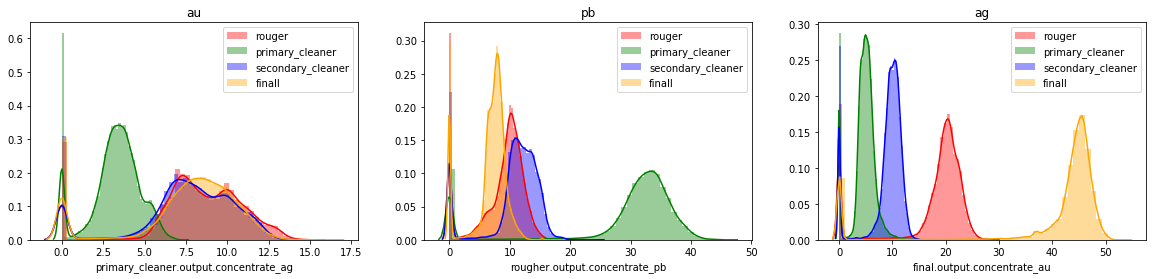

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))
c = 0
color = ['red', 'green','blue','orange']
stage =['rouger','primary_cleaner','secondary_cleaner','finall']
for i in range(3):
    axes[i].set_title(metals[i])
    for j in range(4):
        sns.distplot(g_r_full_metall[note[c]],color = color[j], ax=axes[i], label = stage[j])
        c+=1
    axes[i].legend()
    

Концентрация золота растет от этапа к этапу. У платины кон-ция растет первые два этапа, на третьем и в финале она не меняется.\
Концентрация серебра растет два первых этапа, затем следует спад. 

### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

In [35]:
tmp1 = ['rougher.input.feed_size','primary_cleaner.input.feed_size']


In [36]:
g_r_train[tmp1].describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size
count,16860.000000,16860.000000
mean,60.188595,7.297285
std,30.522242,0.619166
min,9.659576,1.080000
25%,47.548897,6.940000
50%,54.066003,7.285000
75%,65.397249,7.700000
max,484.967466,10.470000


In [37]:
g_r_test[tmp1].describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size
count,5856.000000,5856.000000
mean,55.898866,7.264651
std,22.707969,0.611526
min,0.046369,5.650000
25%,43.852884,6.885625
50%,49.964796,7.259333
75%,61.628003,7.650000
max,477.445473,15.500000


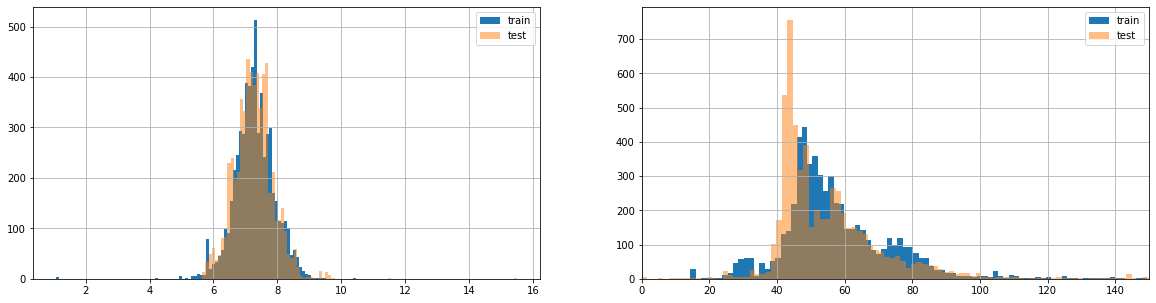

In [38]:
fig, axes = plt.subplots(1,2, figsize=(20, 5))
plt.xlim(0,10)
g_r_train['primary_cleaner.input.feed_size'].sample(n=5856, random_state=12345).hist(bins=100, ax=axes[0],label='train')
g_r_test['primary_cleaner.input.feed_size'].hist(bins=100,ax=axes[0], label='test', alpha = 0.5)
axes[0].legend()
plt.xlim(0,150)
g_r_train['rougher.input.feed_size'].sample(n=5856, random_state=12345).hist(bins=300, ax=axes[1],label='train')
g_r_test['rougher.input.feed_size'].hist(bins=300,ax=axes[1], label='test', alpha = 0.5)
axes[1].legend();

Входное сырье немного различается, но уже после процесса флотации размер в обоих выборках уравнивается

Проверим гипотезу о равенстве двух средних генеральных совокупностей

In [39]:
alpha = .01
results = st.ttest_ind(g_r_train['primary_cleaner.input.feed_size'], g_r_test['primary_cleaner.input.feed_size'])
if (results.pvalue < alpha):
    print("Распределения размеров гранул в двух выборках не отличаются", results.pvalue)
else:
    print("Распределения размеров гранул в двух выборках отличаются", results.pvalue)

Распределения размеров гранул в двух выборках не отличаются 0.0004916543727368148


### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

Составим список концентраций металлов на всех четырех этапах

In [40]:
conc =  ['rougher.input.feed_ag','rougher.input.feed_pb','rougher.input.feed_au','rougher.input.feed_sol',
'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb',
         'primary_cleaner.output.concentrate_au',
         'primary_cleaner.output.concentrate_sol',
 'rougher.output.concentrate_ag','rougher.output.concentrate_pb','rougher.output.concentrate_au',
         'rougher.output.concentrate_sol',
'final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_au','final.output.concentrate_sol']

In [41]:
conc.sort()

Построим гистограмму

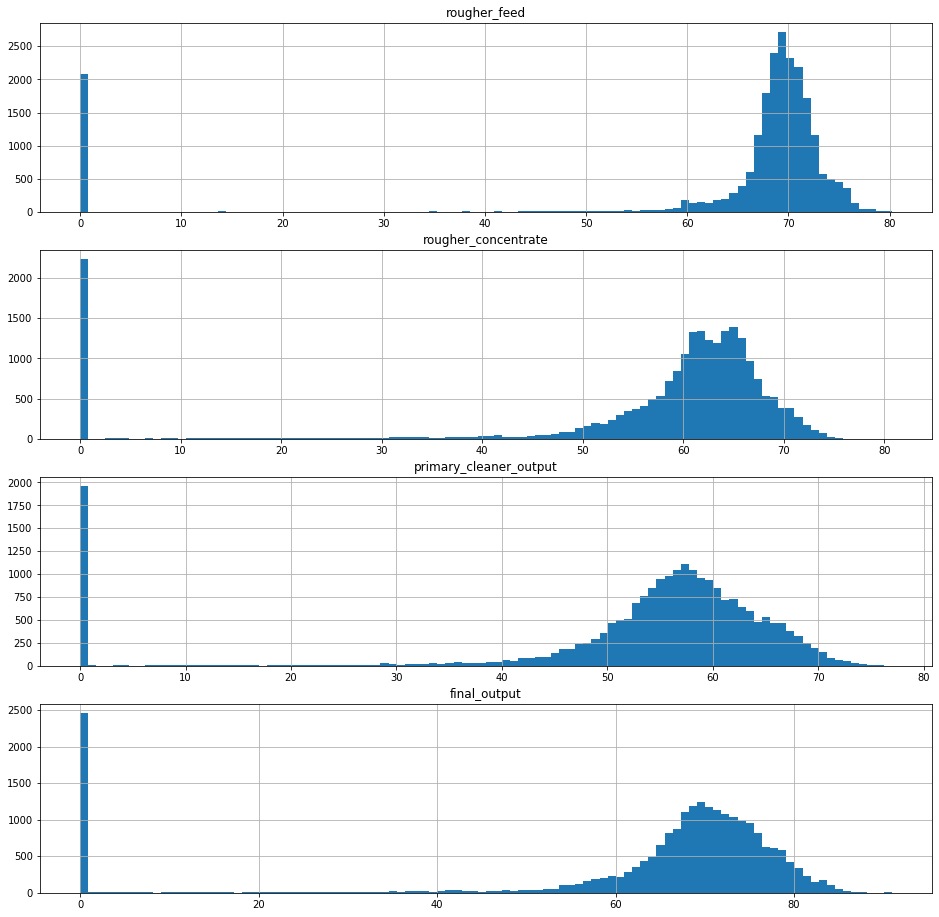

In [42]:
fig, axes = plt.subplots(4,1, figsize=(16, 16))
c = 0
stage = ['rougher_feed', 'rougher_concentrate','primary_cleaner_output','final_output']
for i  in range(0,4):
    axes[i].set_title(stage[i])
    g_r_full[stage[i]]=g_r_full[conc[c]]
    c=c+1
    for j in range(0,3):
        g_r_full[stage[i]]+=g_r_full[conc[c]]
        c=c+1
    g_r_full[stage[i]].hist(bins=100,ax=axes[i])

Посмотрим цифры

In [43]:
g_r_full[conc].describe()

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb,rougher.input.feed_sol,rougher.output.concentrate_ag,rougher.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_sol
count,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000,22716.000000
mean,4.768013,39.891718,9.071366,8.537502,7.666972,29.119967,8.809217,9.371878,8.044237,7.545861,3.282945,32.983766,10.845609,17.831509,6.886869,25.954439
std,2.042594,13.540157,3.260960,3.858203,3.134033,10.650273,3.798169,4.887296,3.148133,3.047761,1.462554,11.796578,4.406924,6.842737,2.831347,10.285947
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.011471,42.353890,8.737809,7.036629,6.756639,29.336078,7.649745,6.682038,6.935723,6.473371,2.634169,32.307303,10.112351,17.894015,6.366740,25.650416
50%,4.949959,44.639019,9.910363,8.858385,8.256062,32.345542,9.882876,9.696983,8.295898,7.879193,3.419915,36.482647,11.774115,19.995513,7.570890,29.352796
75%,5.857985,46.106662,10.927188,10.667178,9.690952,34.762169,11.234420,13.076193,10.127434,9.664583,4.199225,39.619407,13.609712,21.562366,8.477617,31.988246
max,16.001945,53.611374,17.031899,19.615720,16.081632,45.933934,17.081278,22.458114,14.869652,14.093363,7.142594,53.477742,24.480271,28.824507,18.394042,40.089993


На распределении видно что около нуля имеется большое кол-во измерений. 
Построим диаграммы размаха для наших концентраций и посмотрим где относитнльно их лежат нулевые значения

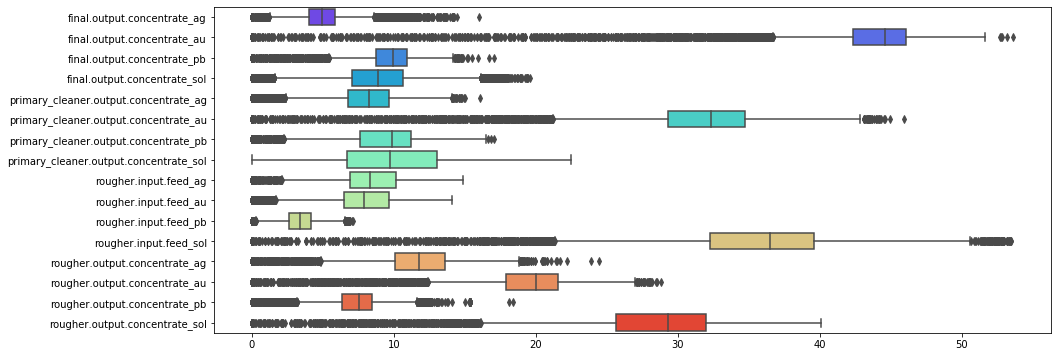

In [44]:
plt.figure(figsize=(15,6))
sns.boxplot(order=conc, data=g_r_full, palette='rainbow', orient="h");


Единственный признак у которого нормальные значения захватывают ноль это r_c_o_sol. Остальные не добираются до 0.2
Удалим аномальные значения

In [45]:
#Создадим список из названия процессов производства
processes = ['rougher.input.feed_', 
             'rougher.output.concentrate_', 
             'primary_cleaner.output.concentrate_', 
             'final.output.concentrate_']

In [46]:
for process in processes:
    for metal in metals:
        g_r_train = g_r_train.loc[g_r_train[process+metal] !=0]
        if process==processes[0]:
            g_r_test = g_r_test.loc[g_r_test[process+metal] !=0]

Так же удалим нулевые данные в тесте и трейне

In [47]:
g_r_train.shape, g_r_test.shape

((14973, 86), (5485, 52))

In [48]:
g_r_train.dropna(inplace = True)
g_r_test.dropna(inplace = True)

In [49]:
g_r_train.shape, g_r_test.shape

((13709, 86), (5485, 52))

# 3. Модель

### 3.1. Напишите функцию для вычисления итоговой sMAPE.

In [50]:
def sMAPE (prediction, target):
    return  np.mean(2 * np.abs(prediction - target) / (np.abs(target) + np.abs(prediction))) * 100 

In [51]:
def final_sMAPE(smape_rougher, smape_final):
        return (0.25 * smape_rougher) + (0.75 * smape_final)

### 3.2. Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.



Чтобы вычислить эффективность обогащаения, воспользуемся функцией recovery , на вход которой,необходимо подадим 

С - 'rougher.output.concentrate_au' 

F - 'rougher.input.feed_au' 

T - 'rougher.output.tail_au'

Далее мы понимаем, чтобы нам предсказать целевой признак rougher.output.recovery, мы должны обучится на признаках, которые относятся к этапу rougher, так как следующие производтвенные цепочки еще не были начаты/закончены. 
Будем предсказывать два целевых признака:

rougher.output.concentrate_au

rougher.output.tail_au

Создадим  наборы обучающей и тестовой выборки для этапа флотации 

In [52]:

rougher_columns = g_r_test.loc[:, g_r_test.columns.str.contains('rougher')].columns

rougher_features_train = g_r_train[rougher_columns]
rouger_target_train= g_r_train[['rougher.output.concentrate_au', 'rougher.output.tail_au']]

rougher_features_test = g_r_test[rougher_columns]
rougher_target_test = g_r_full[['rougher.output.recovery']].query('index in @g_r_test.index')

In [53]:
rougher_features_train.shape, rougher_features_test.shape

((13709, 22), (5485, 22))

Создадим наборы обучающей и тестовой выборки для финального этапа 

Для обучения модели доступны признаки из тестовой выборки. Параметрами для финального этапа являются входные параметры сырья и химикатов  для этапов первичной, вторичной и финальной очистки , а так же показатели процесса. 

In [54]:
final_columns= set(test)- set(rougher_columns)# из тестовой выборки удаляем признаки этапа rougher.

In [55]:
final_columns

{'primary_cleaner.input.depressant',
 'primary_cleaner.input.feed_size',
 'primary_cleaner.input.sulfate',
 'primary_cleaner.input.xanthate',
 'primary_cleaner.state.floatbank8_a_air',
 'primary_cleaner.state.floatbank8_a_level',
 'primary_cleaner.state.floatbank8_b_air',
 'primary_cleaner.state.floatbank8_b_level',
 'primary_cleaner.state.floatbank8_c_air',
 'primary_cleaner.state.floatbank8_c_level',
 'primary_cleaner.state.floatbank8_d_air',
 'primary_cleaner.state.floatbank8_d_level',
 'secondary_cleaner.state.floatbank2_a_air',
 'secondary_cleaner.state.floatbank2_a_level',
 'secondary_cleaner.state.floatbank2_b_air',
 'secondary_cleaner.state.floatbank2_b_level',
 'secondary_cleaner.state.floatbank3_a_air',
 'secondary_cleaner.state.floatbank3_a_level',
 'secondary_cleaner.state.floatbank3_b_air',
 'secondary_cleaner.state.floatbank3_b_level',
 'secondary_cleaner.state.floatbank4_a_air',
 'secondary_cleaner.state.floatbank4_a_level',
 'secondary_cleaner.state.floatbank4_b_air',
 

In [56]:

final_features_train = g_r_full[final_columns].query('index in @g_r_train.index')
final_target_train = g_r_train[['final.output.recovery']]

final_features_test = g_r_full[final_columns].query('index in @g_r_test.index')
final_target_test = g_r_full[['final.output.recovery']].query('index in @g_r_test.index')

In [57]:
final_features_test.shape, final_features_train.shape

((5485, 30), (13709, 30))

Посчитаем SMAPE  для константной модели

Recovery для этапа флотации

In [58]:
predicted = rougher_target_test.mean()
print(sMAPE(predicted,rougher_target_test))

rougher.output.recovery    10.482616
dtype: float64


Recovery для финального этапа

In [59]:
predicted = final_target_test.mean()
print(sMAPE(predicted,final_target_test))

final.output.recovery    11.550011
dtype: float64


Создадим Pipeline и хэш-таблицу с параметрами для подбора модели с помощью решетчатого поиска

In [60]:
pipe = Pipeline([('scaler', MinMaxScaler()), 
                 ('model', MultiOutputRegressor(LinearRegression()))])
param_grid = [{'model': [MultiOutputRegressor(LinearRegression())]}, 
               {'model': [MultiOutputRegressor(Ridge())]}, 
               {'model': [MultiOutputRegressor(Lasso())]}, 
               {'model': [MultiOutputRegressor(SGDRegressor())]}, 
               {'model': [MultiOutputRegressor(SVR(kernel='poly'))]}, 
               {'model': [MultiOutputRegressor(LinearSVR())]}, 
               {'model': [MultiOutputRegressor(RandomForestRegressor())]}, 
               {'model': [MultiOutputRegressor(XGBRegressor(objective ='reg:squarederror'))]}]

In [61]:
kfold = KFold(n_splits=3)

In [62]:
#Модель для rougher
grid_model_rougher = GridSearchCV(pipe, param_grid=param_grid, cv=kfold, n_jobs=-1)

#Модель для final
grid_model_final = GridSearchCV(pipe, param_grid=param_grid, cv=kfold, n_jobs=-1)

In [63]:
grid_model_rougher.fit(rougher_features_train,rouger_target_train);

In [64]:

grid_model_rougher.best_params_

{'model': MultiOutputRegressor(estimator=SGDRegressor(alpha=0.0001, average=False,
                                             early_stopping=False, epsilon=0.1,
                                             eta0=0.01, fit_intercept=True,
                                             l1_ratio=0.15,
                                             learning_rate='invscaling',
                                             loss='squared_loss', max_iter=1000,
                                             n_iter_no_change=5, penalty='l2',
                                             power_t=0.25, random_state=None,
                                             shuffle=True, tol=0.001,
                                             validation_fraction=0.1, verbose=0,
                                             warm_start=False),
                      n_jobs=None)}

Лучшей моделью для этапа rougher оказалась SVR

In [65]:
#Получим предсказания
predict_recovery = pd.DataFrame(grid_model_rougher.predict(rougher_features_test))

In [66]:
#Посчитаем предсказанный recovery
С_rougher = predict_recovery[0]
F_rougher = rougher_features_test['rougher.input.feed_au'].reset_index()
F_rougher = F_rougher.drop('date', axis=1)['rougher.input.feed_au']
T_rougher = predict_recovery[1]
Recovery_ = recovery(С_rougher, F_rougher, T_rougher);

In [67]:
rougher_target_test = rougher_target_test.reset_index()
rougher_target_test = rougher_target_test.drop('date', axis=1)['rougher.output.recovery']

In [68]:
sMAPE_rougher = sMAPE(rougher_target_test, Recovery_)
print('Метрика после rougher:{}'.format(sMAPE_rougher))

Метрика после rougher:12.907439185187123


Перейдем к финальному этапу

In [69]:
grid_model_final.fit(final_features_train, final_target_train); 

Посмотрим, какая модель и с какими параметрами оказалась лучшe

In [70]:
grid_model_final.best_params_

{'model': MultiOutputRegressor(estimator=SGDRegressor(alpha=0.0001, average=False,
                                             early_stopping=False, epsilon=0.1,
                                             eta0=0.01, fit_intercept=True,
                                             l1_ratio=0.15,
                                             learning_rate='invscaling',
                                             loss='squared_loss', max_iter=1000,
                                             n_iter_no_change=5, penalty='l2',
                                             power_t=0.25, random_state=None,
                                             shuffle=True, tol=0.001,
                                             validation_fraction=0.1, verbose=0,
                                             warm_start=False),
                      n_jobs=None)}

In [71]:
final_features_test.dropna(inplace = True)

In [72]:
#Получим предсказания
final_predict_recovery = pd.DataFrame(grid_model_final.predict(final_features_test))

In [73]:
final_predict_recovery  = final_predict_recovery [0]
final_target_test = final_target_test.reset_index()
final_target_test = final_target_test.drop('date', axis=1)['final.output.recovery']

In [74]:
sMAPE_final = sMAPE(final_target_test,final_predict_recovery)
print('Метрика после final:{}'.format(sMAPE_final))

Метрика после final:9.906621159066388


Лучшей моделью для этапа final оказалась SGDRegressor

Итоговая метрика качества модели

In [75]:
final_sMAPE(sMAPE_rougher, sMAPE_final)

10.656825665596571

### Вывод

Выбраны две модели для предсказания recovery, со средним отклонением ошибки предсказания - 10,59%. 